In [31]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

from tqdm.notebook import trange,tqdm


In [32]:
class SineDataset(Dataset):
    
    def __init__(self,num_datapoints):
        self.x_data =  torch.rand(num_datapoints,1)*18-9
        self.y_data = (torch.sin(self.x_data))/2.5
        
        self.y_data+= torch.rand_like(self.y_data)/20
    
    def __getitem__(self, index):
        
        return self.x_data[index] , self.y_data[index]
    
    
    def __len__(self):
        return self.x_data.shape[0]
            

In [33]:
n_x_train = 30000
n_x_test= 8000
batch_size= 256

dataset_train = SineDataset(n_x_train)
dataset_test = SineDataset(n_x_test)


data_loader_train = DataLoader(dataset= dataset_train,batch_size=batch_size, shuffle=True)
data_loader_test = DataLoader(dataset= dataset_test,batch_size=batch_size, shuffle=False)

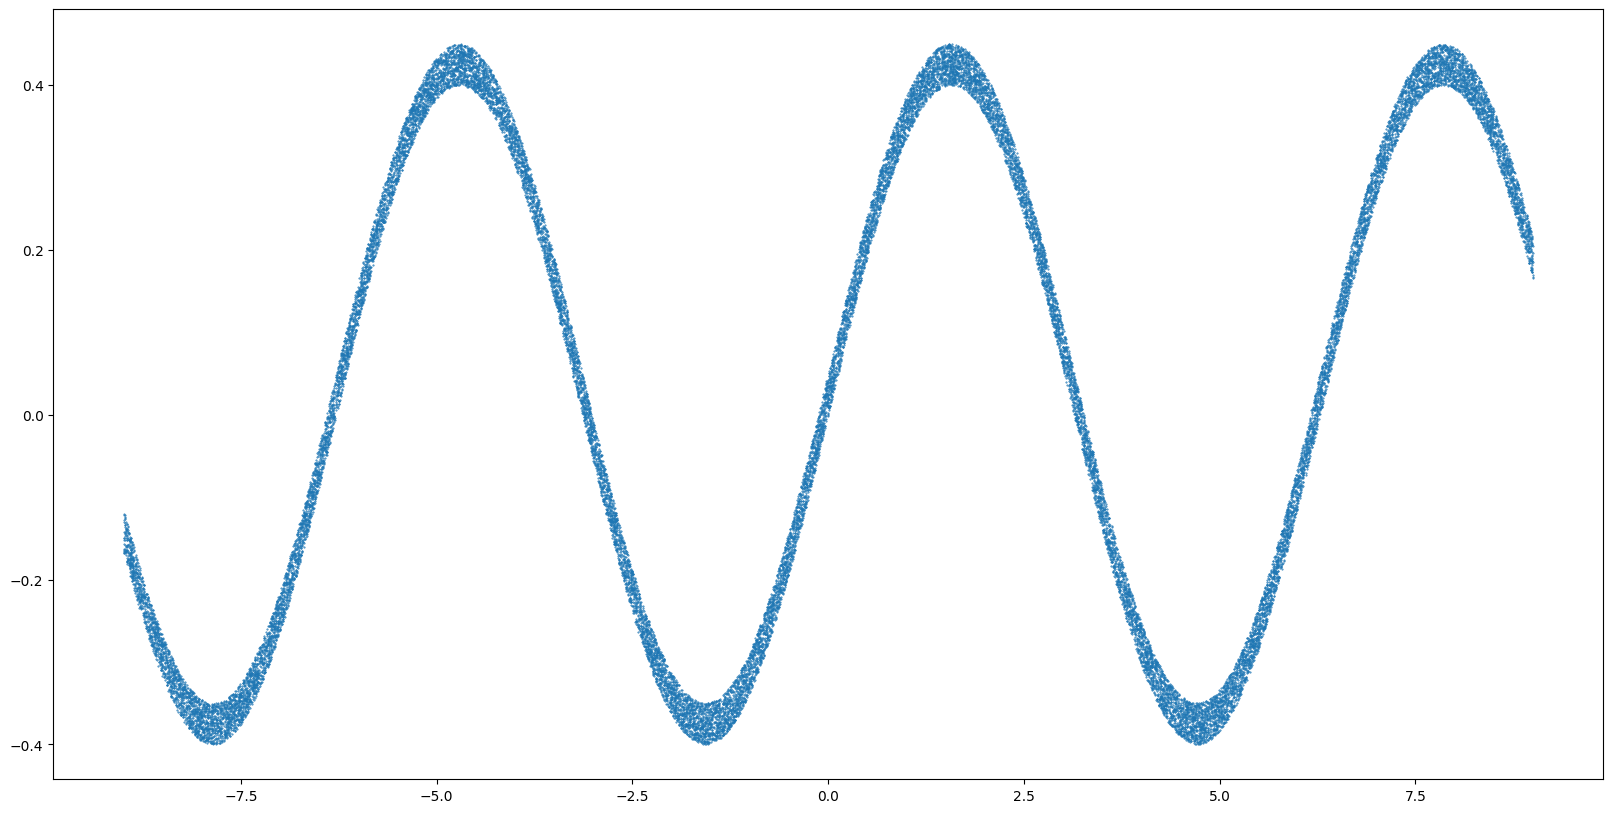

In [34]:
fig = plt.figure(figsize=(20,10))
plt.scatter(dataset_train.x_data,dataset_train.y_data, s=0.2)

In [35]:
class ShallowLinear(nn.Module):
    def __init__(self,input_size, output_size,hidden_size):
        
        super(ShallowLinear,self).__init__()
        
        self.linear1= nn.Linear(input_size,hidden_size)
        self.linear2= nn.Linear(hidden_size,hidden_size)
        self.linear3= nn.Linear(hidden_size,hidden_size)
        self.linear4= nn.Linear(hidden_size,output_size)
        
    
    def forward(self,x):
        x = self.linear1(x)
        x= torch.tanh(x)
        x= self.linear2(x)
        x= torch.tanh(x)
        x= self.linear3(x)
        x= torch.tanh(x)
        
        x = self.linear4(x)
        
        return x
        
    

In [36]:
learning_rate = 0.01
nepochs= 10

shallow_model = ShallowLinear(input_size=1, output_size=1,hidden_size=64)

optimizer = optim.Adam(shallow_model.parameters(), lr = learning_rate)

loss_fn= nn.MSELoss()








In [37]:
training_loss= []
testing_loss= []

In [38]:
for epochs in trange(nepochs, desc="Epochs", leave=False):
    
    for x,y in tqdm(data_loader_train,desc="Training",leave=False):
        
        y_predict =  shallow_model(x)
        loss = loss_fn(y_predict,y)
        
        
        optimizer.zero_grad()
        
        
        loss.backward()
        
        
        optimizer.step()
        
        training_loss.append(loss.item())
        
        
        
    with torch.no_grad():
        
        test_loss_acc=0
        
        for i , (x,y) in enumerate(tqdm(data_loader_test, desc="Testing", leave=False)):
        
            y_predict = shallow_model(x)
            
            loss = loss_fn(y_predict,y)
            
            testing_loss.append(loss.item())
            
            test_loss_acc+=loss
        test_loss_acc/=(i+1)
        
print("Epoches [%d/%d], Average Test Loss %.4f" %(epochs,nepochs,test_loss_acc))            
            

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/118 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/118 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/118 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/118 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/118 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/118 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/118 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/118 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/118 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Training:   0%|          | 0/118 [00:00<?, ?it/s]

Testing:   0%|          | 0/32 [00:00<?, ?it/s]

Epoches [9/10], Average Test Loss 0.0019


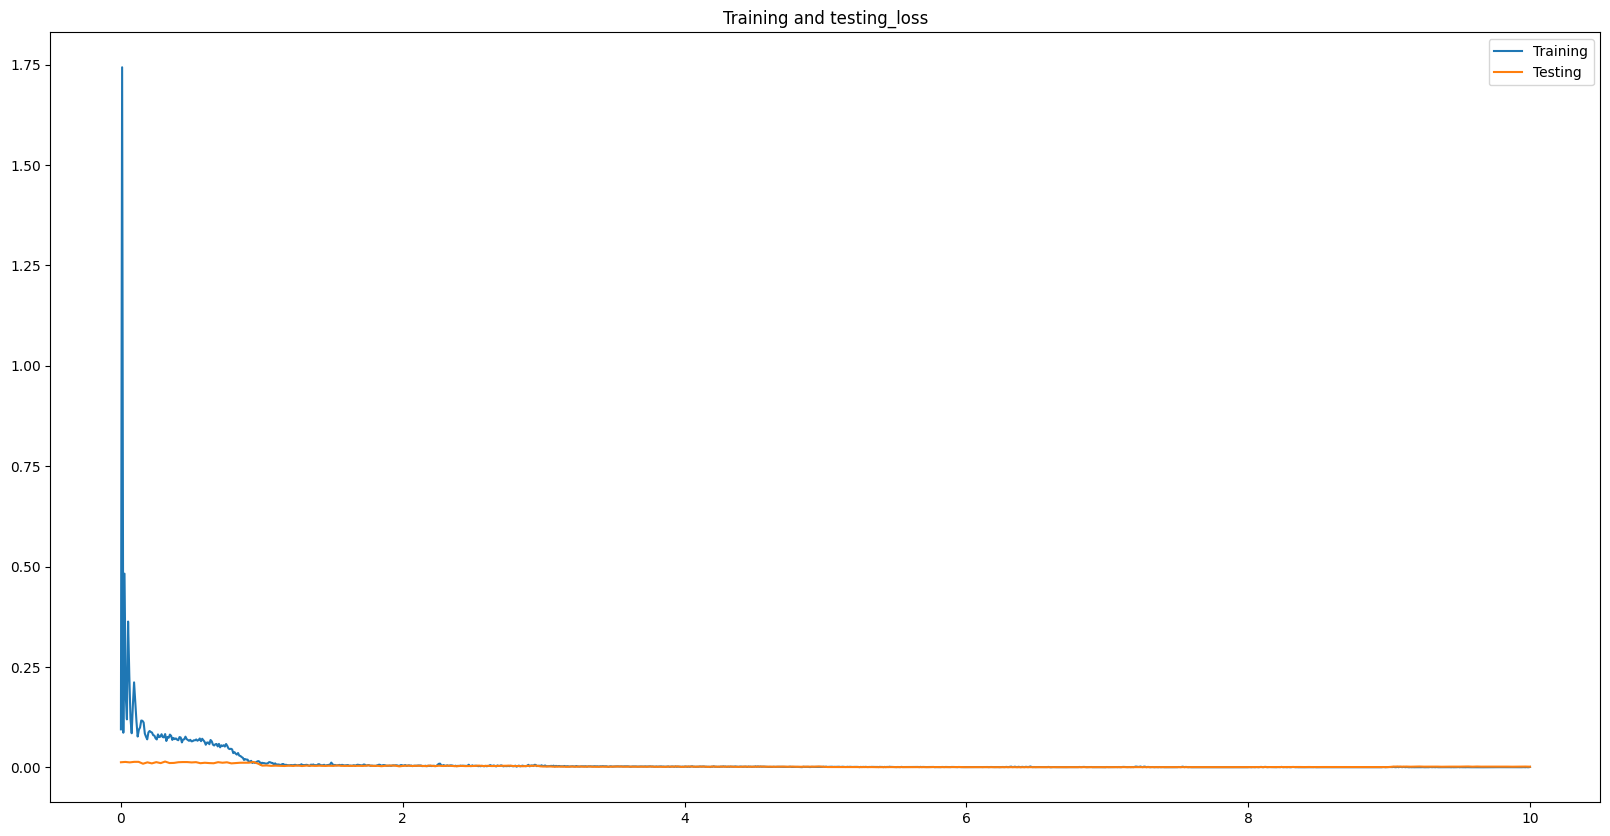

In [39]:
fig = plt.figure(figsize=(20,10))
plt.plot(np.linspace(0,nepochs,len(training_loss)),training_loss)
plt.plot(np.linspace(0,nepochs,len(testing_loss)),testing_loss)
title= plt.title("Training and testing_loss")
legend= plt.legend(["Training","Testing"])